In [ ]:
%matplotlib inline
import numpy as np

In [ ]:
%cd /content


/content


In [ ]:
!pwd

/content


In [ ]:

!git clone https://github.com/Nambininjanahary/Lung-cancer-detection.git

Cloning into 'Lung-cancer-detection'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 36 (delta 3), reused 5 (delta 0), pack-reused 21 (from 1)
Receiving objects: 100% (36/36), 9.31 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [38]:
!pip install -r https://raw.githubusercontent.com/Nambininjanahary/Lung-cancer-detection/refs/heads/main/requirements.txt



  Using cached blosc-1.11.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (16 kB)
  Using cached diskcache-4.1.0-py2.py3-none-any.whl.metadata (19 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached simpleitk-2.5.3-cp311-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (7.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00


In [39]:
%cd /content/Lung-cancer-detection/notebooks

/content/Lung-cancer-detection/notebooks


In [40]:
import sys
sys.path.append('..')

In [45]:
from notebooks.dsets import getCandidateInfoList, getCt, LunaDataset
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [46]:
print(len(positiveInfo_list))
print(positiveInfo_list[0])

1351
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))


In [47]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  32.3 mm
 100  17.7 mm
 200  13.0 mm
 300  10.0 mm
 400   8.2 mm
 500   7.0 mm
 600   6.3 mm
 700   5.7 mm
 800   5.1 mm
 900   4.7 mm
1000   4.0 mm
1100   0.0 mm
1200   0.0 mm
1300   0.0 mm


In [48]:
for candidateInfo_tup in positiveInfo_list[:10]:
    print(candidateInfo_tup)
for candidateInfo_tup in positiveInfo_list[-10:]:
    print(candidateInfo_tup)

for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.

In [49]:
np.histogram(diameter_list)

(array([323, 466, 248, 111,  71,  57,  37,  29,   5,   4]),
 array([ 0.        ,  3.22700302,  6.45400605,  9.68100907, 12.9080121 ,
        16.13501512, 19.36201815, 22.58902117, 25.8160242 , 29.04302722,
        32.27003025]))

In [53]:
from notebooks.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

2025-12-04 14:14:15,385 INFO     pid:499 notebooks.dsets:170:__init__ <notebooks.dsets.LunaDataset object at 0x7f44e128ffe0>: 0 training samples


In [ ]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

In [ ]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(series_uid)

2020-07-26 14:43:09,341 INFO     pid:9828 p2ch10.dsets:212:__init__ <p2ch10.dsets.LunaDataset object at 0x0000018684B30EB8>: 1061 training samples


<IPython.core.display.Javascript object>

1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 0 False [0]


2020-07-26 14:43:11,085 INFO     pid:9828 p2ch10.dsets:212:__init__ <p2ch10.dsets.LunaDataset object at 0x00000186925FA2B0>: 605 training samples


<IPython.core.display.Javascript object>


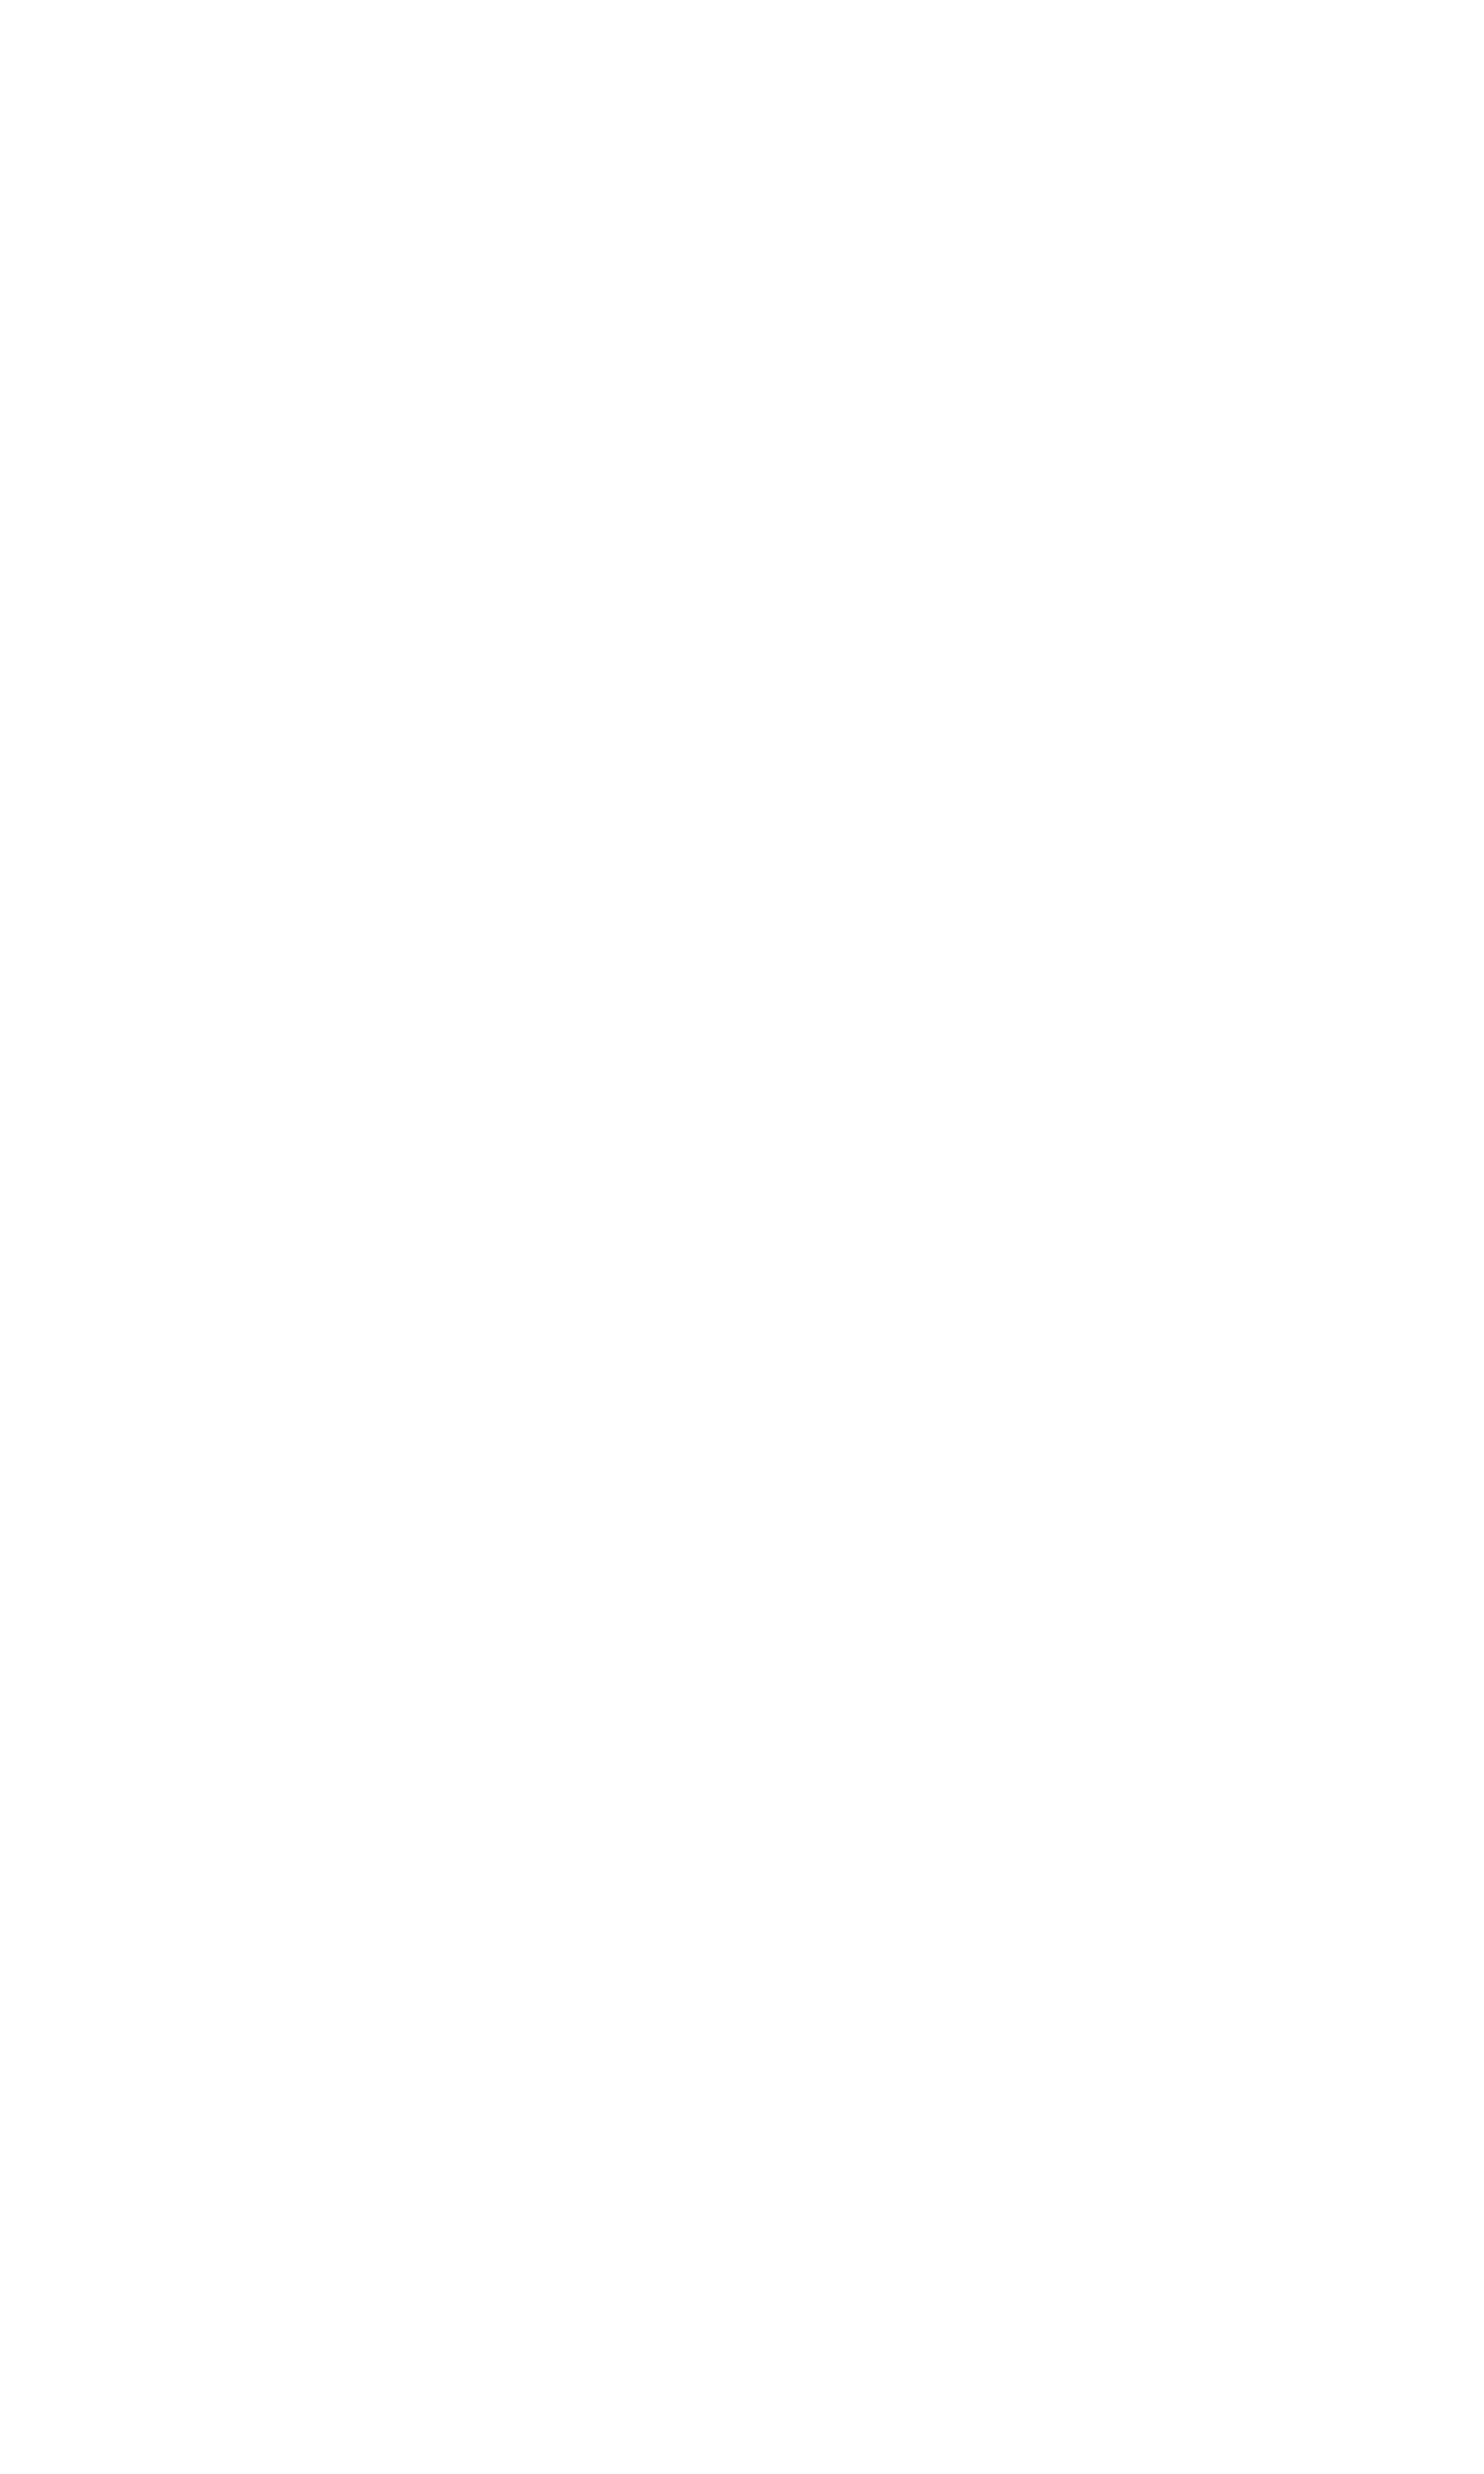

1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 0 False [0]


In [ ]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(series_uid)

In [ ]:
LunaDataset()[0]

2020-07-26 14:43:16,465 INFO     pid:9828 p2ch10.dsets:212:__init__ <p2ch10.dsets.LunaDataset object at 0x00000186979F96A0>: 551065 training samples


(tensor([[[[-732., -810., -863.,  ..., -848., -865., -890.],
           [-767., -826., -855.,  ..., -908., -896., -879.],
           [-807., -859., -848.,  ..., -898., -903., -897.],
           ...,
           [-874., -869., -839.,  ..., -159., -121., -104.],
           [-923., -930., -911.,  ..., -115., -104., -117.],
           [-898., -898., -901.,  ...,  -89.,  -93., -129.]],
 
          [[-776., -779., -860.,  ..., -852., -875., -874.],
           [-839., -834., -889.,  ..., -875., -894., -898.],
           [-861., -857., -882.,  ..., -838., -865., -889.],
           ...,
           [-862., -932., -917.,  ..., -111.,  -94., -101.],
           [-896., -918., -898.,  ...,  -16.,    1.,  -41.],
           [-875., -894., -881.,  ...,  -55.,  -47.,  -83.]],
 
          [[-854., -898., -884.,  ..., -886., -878., -857.],
           [-856., -876., -865.,  ..., -869., -880., -884.],
           [-841., -859., -881.,  ..., -857., -844., -832.],
           ...,
           [-744., -880., -873.

In [ ]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [ ]:
ct = getCt(series_uid)
ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2


# Note: the following visualization doesn't look very good.
It's only included here for completeness.

In [ ]:
import scipy.ndimage.morphology
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [ ]:
from p2ch10.dsets import getCt
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)


In [ ]:
bones = ct.hu_a * (ct.hu_a > 1.5)
lungs = ct.hu_a * air_mask
ipv.figure()
ipv.pylab.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=100, data_max=900)
ipv.show()

C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
C:\Users\elis\Miniconda3\envs\book\lib\site-packages\ipyvolume\serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)